In [2]:
import pandas as pd
import numpy as np
import os
import pickle
from csv import reader, writer

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime as dt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

In [3]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'data',
 'kc_2project02-Copy1.ipynb',
 'kc_2project02.ipynb',
 'KC_Project02.ipynb',
 'kc_webscraping.ipynb',
 'old data',
 'project2_modeling.ipynb']

### Create big dataframe with all files in 'data' folder

In [7]:
## created big_df to test, 'df' variable is my master dataframe
big_df = pd.read_csv('Dec2018_T_ONTIME_REPORTING.csv')

filelist = ['April2018_T_ONTIME_REPORTING.csv',
 'August2018_T_ONTIME_REPORTING.csv',
 'Feb2018_T_ONTIME_REPORTING.csv',
 'Jan2018_T_ONTIME_REPORTING.csv',
 'July2018_T_ONTIME_REPORTING.csv',
 'June2018_T_ONTIME_REPORTING.csv',
 'March2018_T_ONTIME_REPORTING.csv',
 'May2018_T_ONTIME_REPORTING.csv',
 'November2018_T_ONTIME_REPORTING.csv',
 'October2018_T_ONTIME_REPORTING.csv',
 'September2018_T_ONTIME_REPORTING.csv']
for file in filelist:
    df2 = pd.read_csv(file)
    big_df = big_df.append(df2,ignore_index=True)
    
big_df.drop_duplicates(keep='first')
big_df.info()

/Users/KC/miniconda3/envs/metis/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734708 entries, 0 to 2734707
Data columns (total 30 columns):
ACTUAL_ELAPSED_TIME      float64
AIR_TIME                 float64
ARR_DELAY                float64
ARR_TIME                 float64
CARRIER_DELAY            float64
CRS_DEP_TIME             int64
CRS_ELAPSED_TIME         float64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
DEP_DELAY                float64
DEP_TIME                 float64
DEST                     object
DEST_AIRPORT_ID          int64
DEST_AIRPORT_SEQ_ID      int64
DEST_CITY_MARKET_ID      int64
DEST_CITY_NAME           object
FL_DATE                  object
LATE_AIRCRAFT_DELAY      float64
MONTH                    int64
NAS_DELAY                float64
OP_CARRIER_AIRLINE_ID    float64
OP_UNIQUE_CARRIER        object
ORIGIN                   object
ORIGIN_AIRPORT_ID        int64
ORIGIN_CITY_NAME         object
SECURITY_DELAY           float64
Unnamed: 27              float64
Unnamed: 28       

## Cleaning dataframe: nulls, column names

In [8]:
big_df.isnull().sum()

ACTUAL_ELAPSED_TIME        57747
AIR_TIME                   57747
ARR_DELAY                  58550
ARR_TIME                   53129
CARRIER_DELAY            2246984
CRS_DEP_TIME                   0
CRS_ELAPSED_TIME               7
DAY_OF_MONTH                   0
DAY_OF_WEEK                    0
DEP_DELAY                  52147
DEP_TIME                   50535
DEST                           0
DEST_AIRPORT_ID                0
DEST_AIRPORT_SEQ_ID            0
DEST_CITY_MARKET_ID            0
DEST_CITY_NAME                 0
FL_DATE                        0
LATE_AIRCRAFT_DELAY      2246984
MONTH                          0
NAS_DELAY                2246984
OP_CARRIER_AIRLINE_ID    1702836
OP_UNIQUE_CARRIER              0
ORIGIN                         0
ORIGIN_AIRPORT_ID              0
ORIGIN_CITY_NAME               0
SECURITY_DELAY           2246984
Unnamed: 27              2734708
Unnamed: 28              2734708
WEATHER_DELAY            2246984
YEAR                           0
dtype: int

In [9]:
big_df.columns = big_df.columns.str.lower()
big_df.columns

Index(['actual_elapsed_time', 'air_time', 'arr_delay', 'arr_time',
       'carrier_delay', 'crs_dep_time', 'crs_elapsed_time', 'day_of_month',
       'day_of_week', 'dep_delay', 'dep_time', 'dest', 'dest_airport_id',
       'dest_airport_seq_id', 'dest_city_market_id', 'dest_city_name',
       'fl_date', 'late_aircraft_delay', 'month', 'nas_delay',
       'op_carrier_airline_id', 'op_unique_carrier', 'origin',
       'origin_airport_id', 'origin_city_name', 'security_delay',
       'unnamed: 27', 'unnamed: 28', 'weather_delay', 'year'],
      dtype='object')

In [10]:
new_cols = {'day_of_month':'day', 'day_of_week':'weekday','op_unique_carrier':'carrier'}
big_df.rename(columns = new_cols, inplace = True)

In [11]:
## drop unnamed: columns with all nulls
big_df = big_df.drop(['unnamed: 28','unnamed: 27'], axis =1)

In [12]:
## checking for total nulls
big_df.isnull().sum()

actual_elapsed_time        57747
air_time                   57747
arr_delay                  58550
arr_time                   53129
carrier_delay            2246984
crs_dep_time                   0
crs_elapsed_time               7
day                            0
weekday                        0
dep_delay                  52147
dep_time                   50535
dest                           0
dest_airport_id                0
dest_airport_seq_id            0
dest_city_market_id            0
dest_city_name                 0
fl_date                        0
late_aircraft_delay      2246984
month                          0
nas_delay                2246984
op_carrier_airline_id    1702836
carrier                        0
origin                         0
origin_airport_id              0
origin_city_name               0
security_delay           2246984
weather_delay            2246984
year                           0
dtype: int64

In [30]:
## create smaller df with less columns
smaller_df = big_df.drop(['arr_time','air_time','arr_delay','actual_elapsed_time',
                          'carrier_delay','crs_dep_time','crs_elapsed_time',
                          'dest_airport_id','dest_airport_seq_id','dest_city_market_id',
                          'dest_city_name','op_carrier_airline_id','origin_airport_id',
                          'origin_city_name','late_aircraft_delay','weather_delay',
                          'nas_delay','security_delay','year'],axis=1)
smaller_df.isnull().sum()

day              0
weekday          0
dep_delay    52147
dep_time     50535
dest             0
fl_date          0
month            0
carrier          0
origin           0
dtype: int64

In [31]:
smaller_df = smaller_df[['month','fl_date','weekday','carrier',
                        'origin','dep_time','dep_delay']]
smaller_df = smaller_df.dropna()
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2682561 entries, 0 to 2734707
Data columns (total 7 columns):
month        int64
fl_date      object
weekday      int64
carrier      object
origin       object
dep_time     float64
dep_delay    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 163.7+ MB


## Filter for just top CA origin airports

In [32]:
ca_air = ['LAX','SFO','SJC']
ca_df = smaller_df[smaller_df.origin.isin(ca_air)]
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447302 entries, 0 to 2734700
Data columns (total 7 columns):
month        447302 non-null int64
fl_date      447302 non-null object
weekday      447302 non-null int64
carrier      447302 non-null object
origin       447302 non-null object
dep_time     447302 non-null float64
dep_delay    447302 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 27.3+ MB


## Change Weekday Num to Weekday Name

In [33]:
ca_df['weekday'].value_counts()

1    67515
5    66585
4    66030
3    64841
2    64100
7    63733
6    54498
Name: weekday, dtype: int64

In [34]:
weekdays = [1,2,3,4,5]
weekend_col = []
for each in ca_df['weekday']:
    if each in weekdays:
        each = 0
        weekend_col.append(each)
    else:
        each = 1
        weekend_col.append(each)

weekend_col        

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [35]:
# create dummy variable for weekend or not
ca_df['weekend'] = weekend_col
ca_df.head()

/Users/KC/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,month,fl_date,weekday,carrier,origin,dep_time,dep_delay,weekend
0,12,2018-12-23,7,UA,LAX,612.0,-3.0,1
1,12,2018-12-23,7,UA,LAX,808.0,-2.0,1
2,12,2018-12-23,7,UA,LAX,1742.0,27.0,1
4,12,2018-12-23,7,UA,SFO,1808.0,19.0,1
5,12,2018-12-23,7,UA,SFO,553.0,-7.0,1


In [36]:
day_list = ['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_col = []
for i in ca_df['weekday']:
    day_name = day_list[i]
    day_col.append(day_name)
    
day_col

['Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tu

In [37]:
ca_df['weekday_name'] = day_col
ca_df.head()

/Users/KC/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,month,fl_date,weekday,carrier,origin,dep_time,dep_delay,weekend,weekday_name
0,12,2018-12-23,7,UA,LAX,612.0,-3.0,1,Sunday
1,12,2018-12-23,7,UA,LAX,808.0,-2.0,1,Sunday
2,12,2018-12-23,7,UA,LAX,1742.0,27.0,1,Sunday
4,12,2018-12-23,7,UA,SFO,1808.0,19.0,1,Sunday
5,12,2018-12-23,7,UA,SFO,553.0,-7.0,1,Sunday


### Convert dep_time column to hour column

In [38]:
empty_col = []
for each in ca_df['dep_time']:
    each = str(each)
    each = each.replace('.0','')
    if len(each) <= 2:
        each = '00:'+each
        each = dt.strptime(each,'%H:%M')
        empty_col.append(each)
    elif len(each) == 3:
        each = '0'+each[0] +':'+each[1:]
        each = dt.strptime(each,'%H:%M')
        empty_col.append(each)
    else:
        each = each[0:2] +':'+ each[2:]
        each = each.replace('24:','00:')
        each = dt.strptime(each,'%H:%M')
        empty_col.append(each)

In [39]:
hour_col = []
for x in empty_col:
    hour = x.hour
    hour_col.append(hour)
    
hour_col    

[6,
 8,
 17,
 18,
 5,
 11,
 19,
 12,
 15,
 9,
 16,
 20,
 11,
 11,
 23,
 16,
 10,
 11,
 12,
 10,
 19,
 10,
 6,
 6,
 18,
 23,
 22,
 15,
 9,
 17,
 20,
 18,
 0,
 9,
 16,
 9,
 16,
 15,
 8,
 14,
 21,
 16,
 8,
 18,
 12,
 0,
 19,
 7,
 13,
 11,
 8,
 8,
 9,
 6,
 11,
 13,
 13,
 13,
 11,
 14,
 0,
 0,
 8,
 15,
 8,
 21,
 22,
 15,
 8,
 10,
 8,
 10,
 7,
 12,
 12,
 20,
 20,
 10,
 13,
 16,
 23,
 6,
 8,
 18,
 13,
 8,
 18,
 13,
 12,
 6,
 13,
 16,
 8,
 19,
 6,
 9,
 5,
 12,
 23,
 15,
 23,
 10,
 16,
 10,
 15,
 21,
 10,
 15,
 23,
 22,
 12,
 14,
 10,
 8,
 16,
 14,
 14,
 9,
 6,
 7,
 17,
 23,
 8,
 7,
 11,
 7,
 7,
 16,
 11,
 13,
 15,
 17,
 22,
 16,
 9,
 13,
 6,
 6,
 7,
 10,
 5,
 17,
 16,
 9,
 17,
 5,
 15,
 17,
 14,
 15,
 9,
 14,
 8,
 23,
 10,
 22,
 19,
 8,
 15,
 23,
 6,
 10,
 19,
 6,
 10,
 22,
 20,
 14,
 8,
 11,
 13,
 18,
 10,
 23,
 12,
 12,
 7,
 11,
 12,
 12,
 8,
 14,
 10,
 9,
 22,
 10,
 7,
 8,
 20,
 0,
 15,
 10,
 6,
 21,
 22,
 5,
 22,
 5,
 7,
 12,
 21,
 18,
 22,
 0,
 10,
 22,
 17,
 8,
 0,
 14,
 9,
 18,
 10,
 12

In [40]:
ca_df['hour'] = hour_col

/Users/KC/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Drop Airlines That Don't Fly Out of All Airports

In [41]:
big_carriers = ['AA','AS','B6','DL','F9','HA','OO','UA','WN']
ca_df = ca_df[ca_df.carrier.isin(big_carriers)]
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428215 entries, 0 to 2734700
Data columns (total 10 columns):
month           428215 non-null int64
fl_date         428215 non-null object
weekday         428215 non-null int64
carrier         428215 non-null object
origin          428215 non-null object
dep_time        428215 non-null float64
dep_delay       428215 non-null float64
weekend         428215 non-null int64
weekday_name    428215 non-null object
hour            428215 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 35.9+ MB


In [42]:
# with open('ca_df.pickle', 'wb') as to_write:
#     pickle.dump(ca_df, to_write)

## Change Negative Values to 0

In [25]:
## IN TIME SERIES PICKLE DF, LEFT DATA WITH NEGATIVES
ca_df['dep_delay'][ca_df['dep_delay'] < 0] = 0


In [27]:
ca_df[ca_df['dep_delay'] == 0]

,month,fl_date,weekday,carrier,origin,dep_time,dep_delay,weekday_name,hour
0,12,2018-12-23,7,UA,LAX,612.0,0.0,Sunday,6
1,12,2018-12-23,7,UA,LAX,808.0,0.0,Sunday,8
5,12,2018-12-23,7,UA,SFO,553.0,0.0,Sunday,5
14,12,2018-12-23,7,UA,LAX,1135.0,0.0,Sunday,11
17,12,2018-12-23,7,UA,SFO,1950.0,0.0,Sunday,19
...,...,...,...,...,...,...,...,...,...
2734677,9,2018-09-30,7,B6,LAX,1511.0,0.0,Sunday,15
2734681,9,2018-09-30,7,B6,LAX,1642.0,0.0,Sunday,16
2734682,9,2018-09-30,7,B6,SFO,849.0,0.0,Sunday,8
2734692,9,2018-09-30,7,B6,SFO,1721.0,0.0,Sunday,17


## Dummies for entire CA flights DataFrame: Carrier & CA Origin Airports

In [153]:
#dummy_df = ca_df.drop('weekday',axis=1) # not dropping Weekday Numerical Value
dummy_df = pd.get_dummies(ca_df, drop_first=True)
dummy_df.head()

,month,weekday,dep_time,dep_delay,weekend,hour,carrier_AS,carrier_B6,carrier_DL,carrier_F9,...,carrier_UA,carrier_WN,origin_SFO,origin_SJC,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
0,12,7,612.0,0.0,1,6,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,12,7,808.0,0.0,1,8,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,12,7,1742.0,27.0,1,17,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,12,7,1808.0,19.0,1,18,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
5,12,7,553.0,0.0,1,5,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


### Reorder columns into new df

In [154]:
dummy_df.columns

Index(['month', 'weekday', 'dep_time', 'dep_delay', 'weekend', 'hour',
       'carrier_AS', 'carrier_B6', 'carrier_DL', 'carrier_F9', 'carrier_HA',
       'carrier_OO', 'carrier_UA', 'carrier_WN', 'origin_SFO', 'origin_SJC',
       'weekday_name_Monday', 'weekday_name_Saturday', 'weekday_name_Sunday',
       'weekday_name_Thursday', 'weekday_name_Tuesday',
       'weekday_name_Wednesday'],
      dtype='object')

In [155]:
cols = ['month', 'dep_delay','weekday', 'weekend', 'hour', 'carrier_AS',
       'carrier_B6', 'carrier_DL', 'carrier_F9', 'carrier_HA', 'carrier_OO',
       'carrier_UA', 'carrier_WN', 'origin_SFO', 'origin_SJC',
       'weekday_name_Monday', 'weekday_name_Saturday', 'weekday_name_Sunday',
       'weekday_name_Thursday', 'weekday_name_Tuesday',
       'weekday_name_Wednesday']

In [156]:
dfCA = dummy_df[cols]

In [239]:
# with open('dummydf.pickle', 'wb') as to_write:
#     pickle.dump(dfCA, to_write)

In [241]:
# with open('dummydf.pickle','rb') as read_file:
#     dummy_df = pickle.load(read_file)

## EDA From DF

In [67]:
ca_df.pivot_table(index='carrier',columns='origin',values='dep_delay',aggfunc=np.mean)

origin,LAX,OAK,SFO,SJC
carrier,,,,
AA,8.628995,6.599620,12.259568,6.992782
AS,6.434370,1.019399,8.453619,1.669961
B6,10.596161,6.835156,13.627883,10.226695
DL,8.215214,3.563241,9.694601,3.342230
F9,14.813899,NaN,29.076819,24.454002
G4,10.167889,16.924936,NaN,NaN
HA,7.753879,11.427689,19.106181,17.141447
NK,6.089595,8.178147,NaN,NaN
OO,5.470909,0.615551,12.341383,1.203912


In [118]:
ca_df['origin'].value_counts()

LAX    186010
SFO    146714
SJC     46529
OAK     44615
Name: origin, dtype: int64

In [ ]:
# Grouping delays
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
ca_df['delay_level'] = ca_df['dep_delay'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="carrier", hue='delay_level', data=ca_df)

labels = ['United','Southwest','American','Alaska','Jet Blue','Delta','SkyWest','Frontier','Hawaiian']
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.title('Flight Delay Level by Carrier')
plt.xlabel('Flight Count', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('On Time (t < 5 min)')
L.get_texts()[1].set_text('Small Delay (5 < t < 45 min)')
L.get_texts()[2].set_text('Large Delay (t > 45 min)')
plt.show()

# Visualization: Mean Dep Delay By Carrier

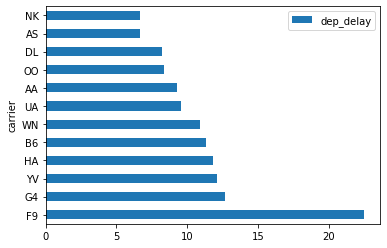

In [19]:
carrier_df = ca_df[['carrier','dep_delay']].groupby('carrier').mean().sort_values('dep_delay',ascending=False)
##carrier_pt = ca_df.pivot_table(index='carrier',values='dep_delay',aggfunc=np.mean)
carrier_df.plot(kind='barh')

# Visualization: Mean Dep Delay by Origin

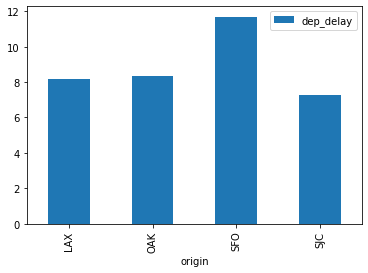

In [20]:
origin_pt = ca_df.pivot_table(index='origin',values='dep_delay',aggfunc=np.mean)
origin_pt.plot(kind='bar')

In [21]:
#ca_df[['hour','dep_delay']].groupby('hour').mean().sort_values('dep_delay', ascending=False)
ca_df[['hour','dep_delay']].groupby('hour').describe()

dep_delay                                                              
         count        mean         std    min     25%    50%     75%     max
hour                                                                        
0       6271.0   24.669431   54.942022  -23.0   -4.00    2.0   31.00  1093.0
1       1557.0   57.665382   80.497572  -16.0    6.00   32.0   86.00   996.0
2        212.0  133.240566   67.409857   45.0   83.75  119.0  157.75   453.0
3         47.0  232.723404  169.601926  111.0  140.00  182.0  262.50  1039.0
4        436.0    3.786697   65.562064  -17.0   -6.00   -4.0   -2.00  1054.0
5      13006.0   -3.577503   20.568770  -21.0   -7.00   -4.0   -2.00   995.0
6      23963.0   -0.772065   33.495301  -24.0   -6.00   -3.0   -1.00  1155.0
7      23613.0    0.335705   30.851779  -28.0   -6.00   -3.0    0.00  1391.0
8      31181.0    1.769475   34.434531  -23.0   -6.00   -3.0    1.00  1407.0
9      28376.0    5.038977   35.406098  -21.0   -5.00   -2.0    4.00  1306.0
10     27807.0    6.149315   29.860067  -23.0   -5.00   -2.0    6.00  1314.0
11     25816.0    9.793190   35.833736  -22.0   -4.00   -1.0   11.00  1406.0
12     25079.0   11.249531   38.024633  -22.0   -5.00   -1.0   11.00  1097.0
13     24003.0   12.476774   37.667765  -19.0   -4.00    0.0   14.00  1855.0
14     21102.0   14.592977   43.131768  -24.0   -5.00    0.0   16.00  1723.0
15     21963.0   11.793289   39.251288  -49.0   -5.00   -1.0   11.00   602.0
16     23053.0   11.293714   40.458428  -35.0   -5.00   -2.0   10.00  1173.0
17     20366.0   12.508495   40.302210  -20.0   -5.00   -1.0   13.00   658.0
18     20390.0   12.225307   40.201114  -23.0   -6.00   -2.0   12.00   641.0
19     20039.0   12.307301   41.764293  -27.0   -6.00   -2.0   12.00   715.0
20     16639.0   15.324118   45.139269  -27.0   -6.00   -1.0   19.00  1430.0
21     17484.0   14.276539   42.806078  -25.0   -5.00   -1.0   15.00   906.0
22     18867.0   11.871787   38.690534  -23.0   -5.00   -1.0   12.00   828.0
23     12598.0   16.852437   47.675485  -27.0   -5.00    0.0   20.00  1064.0

# Visualization: Mean Dep Delay by Day of Month

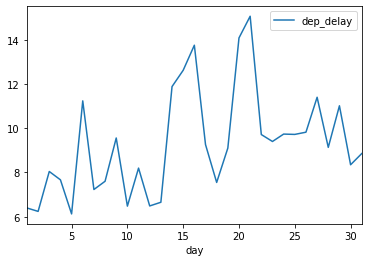

In [22]:
delayday_df = ca_df.pivot_table(index='day',values='dep_delay',aggfunc=np.mean)
delayday_df.plot()